In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import stats
import re

In [5]:
# Load data from CSV file into a Dataframe
dog_rates_data = pd.read_csv('dog_rates_tweets.csv', parse_dates=True)

# Finding tweets containing a "n/10" rating
rate_ten = dog_rates_data.text.str.extract(r'(\d+(\.\d+)?)/10', expand=False)
rate_data = rate_ten[rate_ten[0] <'NaN'][0]


In [7]:
# Removing outliers
rate_data_num = pd.to_numeric(rate_data)
rate_data_num = rate_data_num[rate_data_num <= 25]

# Adding rating to data
dog_rates_data['rating'] = rate_data_num

# Labelling the data using loc method
data_ready = dog_rates_data.loc[rate_data_num.index]

In [8]:
# Making 'created_at' column as a datetime value
data_ready['created_at'] = pd.to_datetime(data_ready['created_at'])

In [9]:
# Writing to_timestamp() function
def to_timestamp(df):
  return df.timestamp()

In [10]:
# Applying to_timestamp() function
data_ready['timestamp'] = data_ready['created_at'].apply(to_timestamp)

In [11]:
data_ready

,id,created_at,text,rating,timestamp
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09
...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09


In [12]:
# Getting best fit line
best_fit = stats.linregress(data_ready['timestamp'], data_ready['rating'])

In [13]:
print(best_fit.slope)
print(best_fit.intercept)

3.515929974847721e-08
-40.46415480898916


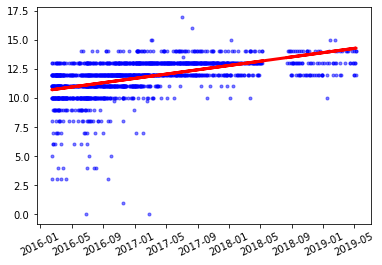

In [14]:
plt.xticks(rotation=25)
plt.plot(data_ready['created_at'].values, data_ready['rating'], 'b.', alpha=0.5)
plt.plot(data_ready['created_at'].values, (data_ready['timestamp']*best_fit.slope) + best_fit.intercept, 'r-', linewidth=3)
plt.show()

In [15]:
# Exercise 7 additions
# p-value
print(best_fit.pvalue)

1.5139606492959894e-106


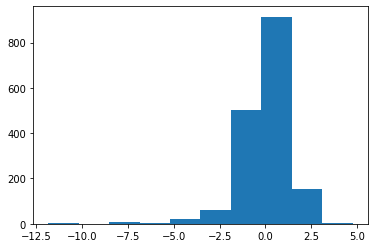

In [16]:
residuals = data_ready['rating'] - (best_fit.slope*data_ready['timestamp'] + best_fit.intercept)
plt.hist(residuals)
plt.show()